# 전략

내가 해야할것들
1. 'Income' 에 대해서 결측치 왜 생긴지 파악
2. 미국 GDP확인하고 알맞게 구간 구분
3. 'MntWines' 확인하고, 알맞게 범주화 하기 
4. 'MntFishProducts' 확인하고, 알맞게 범주화 하기 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import StandardScaler 

In [2]:
ifood_df = pd.read_csv('../ifood_df.csv')
project_df = pd.read_csv('../ml_project1_data.csv')

In [3]:
## 항상 똑같은 값 빼주기

project_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,0,0,0,0


## 'Income'분석
### 결측치 제거 

- 'Income'에서 결측치를 보인값들이 그렇지 않은값들과 차이가 따로 없다. 
- 따라서 그냥 삭제해주고 진행하자

In [4]:
project_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
project_df = project_df[project_df['Income'].notna()].reset_index(drop=True)
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### 'Income'분포 확인

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

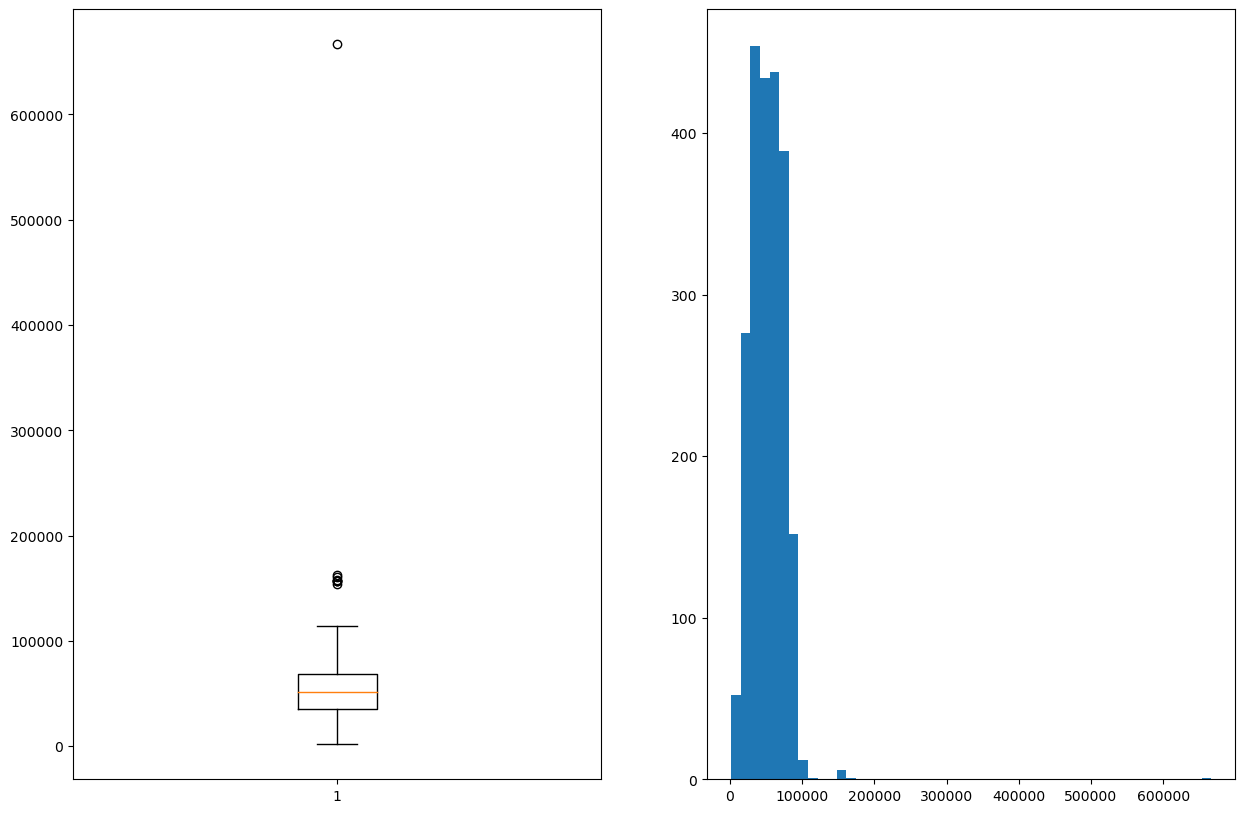

In [6]:
fig = plt.figure(figsize=(15, 10))
ax = fig.subplots(1,2)

ax[0].boxplot(project_df['Income'])
ax[1].hist(project_df['Income'], bins=50)
project_df['Income'].describe()

In [7]:
project_df[project_df['Income'] < 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### 'Income' 이상치 제외 

'Income'이 2만불을 넘는 사람은 한사람뿐이다. 굉장히 이상치이기 때문에 이것을 제외하고 다시 그래프를 그려보자 

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64

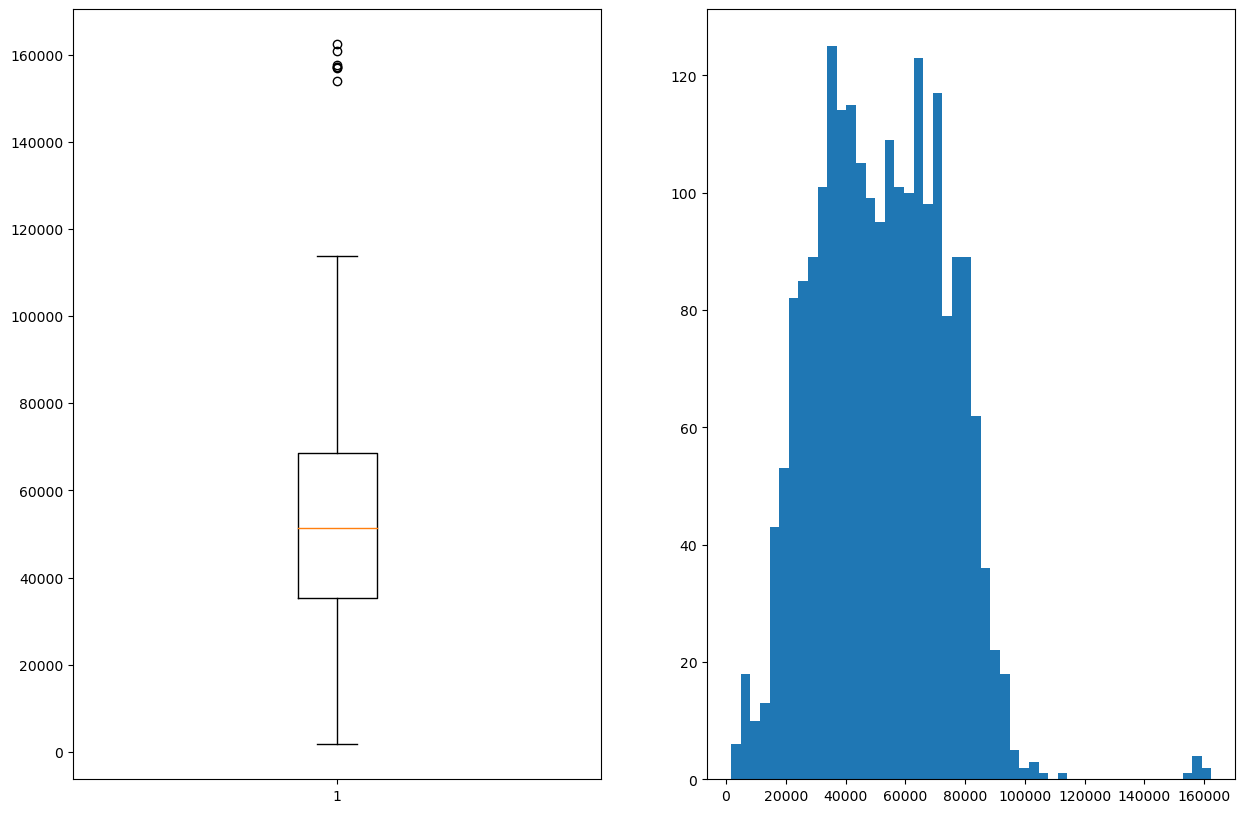

In [8]:
fig = plt.figure(figsize=(15, 10))
ax = fig.subplots(1,2)

ax[0].boxplot(project_df[project_df['Income'] < 200000]['Income'])
ax[1].hist(project_df[project_df['Income'] < 200000]['Income'], bins=50, )
project_df[project_df['Income'] < 200000]['Income'].describe()

In [9]:
project_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
project_df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,3,8,10,4,7
1,2,1,1,2,5
2,1,8,2,10,4
3,2,2,0,4,6
4,5,5,3,6,5
...,...,...,...,...,...
2211,2,9,3,4,5
2212,7,8,2,5,7
2213,1,2,3,13,6
2214,2,6,5,10,3


## Num변수들 살펴보기 
- num_li

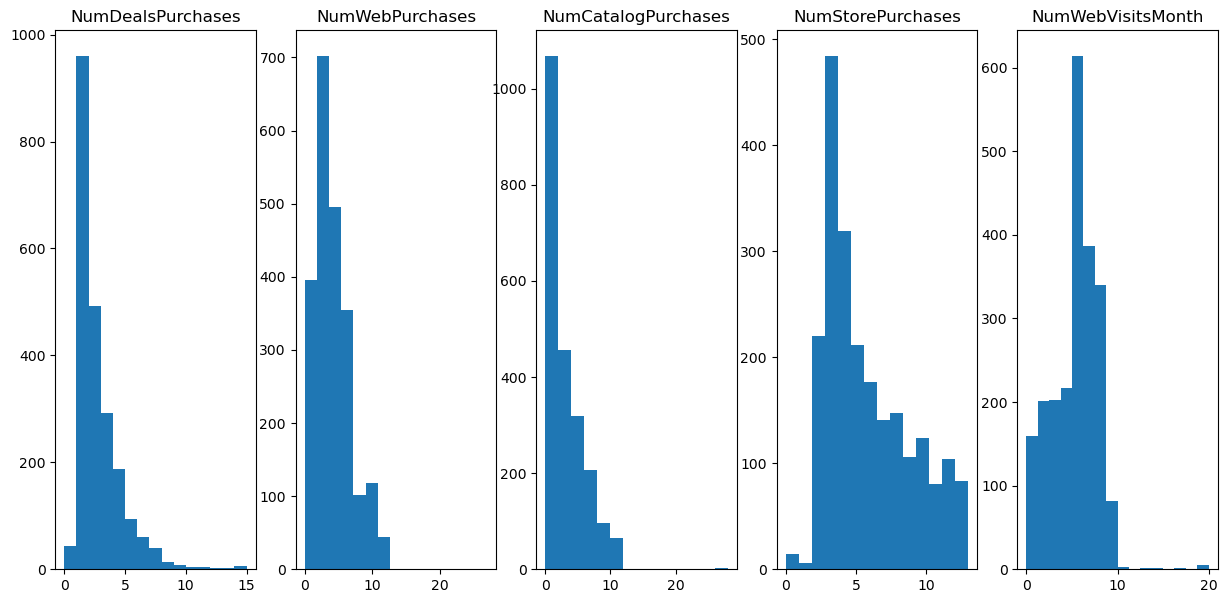

In [11]:
fig = plt.figure(figsize=(15, 7))
ax = fig.subplots(1,5)

num_li = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for ii, col in enumerate(num_li):
    ax[ii].hist(project_df[col], bins=len(set(project_df[col])))
    ax[ii].set_title('{}'.format(col))



## Mnt변수들 살펴보기 
- Mnt_li

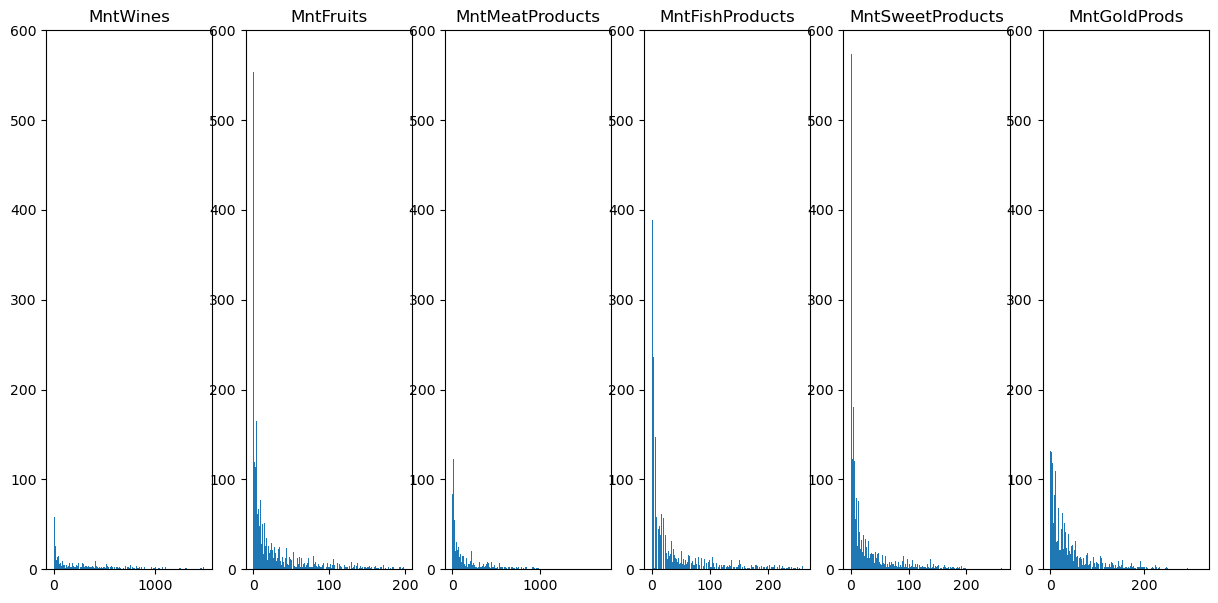

In [12]:
Mnt_li = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

fig = plt.figure(figsize=(15, 7))
ax = fig.subplots(1,len(Mnt_li))



for ii, col in enumerate(Mnt_li):
    ax[ii].hist(project_df[col], bins=len(set(project_df[col])))
    ax[ii].set_title('{}'.format(col))
    ax[ii].set_ylim(0,600)


In [13]:
project_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Accepted변수들 살펴보기  
- accept_li

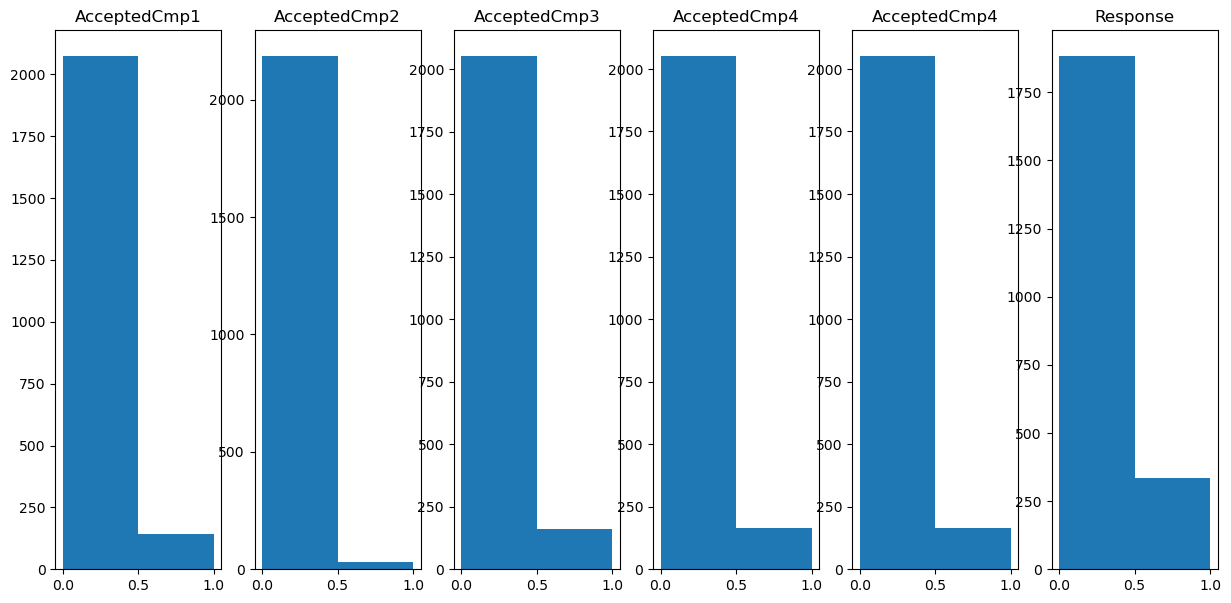

In [14]:
accept_li = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp4', 'Response']

fig = plt.figure(figsize=(15, 7))
ax = fig.subplots(1,len(accept_li))



for ii, col in enumerate(accept_li):
    ax[ii].hist(project_df[col], bins=len(set(project_df[col])))
    ax[ii].set_title('{}'.format(col))


In [15]:
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [16]:


project_df['Year_Birth'] = project_df['Year_Birth'].apply(lambda x : np.abs(x-2023+1))

In [17]:
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,65,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,68,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,57,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,38,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,41,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,55,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2212,4001,76,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2213,7270,41,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2214,8235,66,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [18]:
accept_li = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

(array([1757.,    0.,  323.,    0.,    0.,   81.,    0.,   44.,    0.,
          11.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

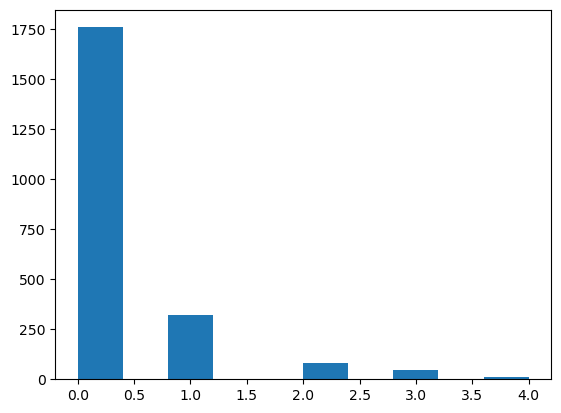

In [19]:
plt.hist(project_df[accept_li].sum(axis=1))

In [20]:
project_df['Accepted_all'] = project_df[accept_li].sum(axis=1)
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Accepted_all
0,5524,65,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,68,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,57,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,38,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,41,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,55,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,0
2212,4001,76,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,1
2213,7270,41,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,1
2214,8235,66,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,0


In [21]:
project_df[project_df['Accepted_all'] == 4]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Accepted_all
241,10089,48,Graduation,Divorced,102692.0,0,0,2013-04-05,5,168,...,0,1,1,1,1,0,3,11,1,4
404,5067,28,Graduation,Together,80134.0,0,0,2014-02-14,11,966,...,0,1,1,1,1,0,3,11,0,4
417,3725,61,PhD,Single,84865.0,0,0,2013-05-09,1,1248,...,0,1,1,1,1,0,3,11,1,4
546,3174,63,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,...,0,1,1,1,1,0,3,11,1,4
811,5536,63,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,...,0,1,1,1,1,0,3,11,1,4
977,8545,68,Graduation,Divorced,85683.0,0,0,2014-03-21,6,1296,...,0,1,1,1,1,0,3,11,1,4
1074,1509,64,PhD,Together,84460.0,0,0,2013-01-04,80,152,...,0,1,1,1,1,0,3,11,1,4
1295,5758,40,Graduation,Married,65169.0,0,0,2014-01-14,23,1074,...,1,0,1,1,1,0,3,11,1,4
1693,477,36,Graduation,Married,83512.0,0,0,2014-06-17,31,1060,...,1,0,1,1,1,0,3,11,1,4
1905,3138,66,Graduation,Single,91249.0,0,0,2012-10-20,84,1324,...,0,1,1,1,1,0,3,11,1,4


In [22]:
Mnt_li

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

# 클러스터링

## 모든 칼럼 전처리 및 normalization

In [62]:
project_df = pd.read_csv('../ml_project1_data.csv')

In [63]:
project_df = project_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
project_df = project_df[project_df['Income'].notna()].reset_index(drop=True)
project_df['Year_Birth'] = project_df['Year_Birth'].apply(lambda x : np.abs(x-2023+1))

project_df['Year_Birth']=StandardScaler().fit_transform(project_df['Year_Birth'].values.reshape(-1,1))

accept_li = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp4', 'Response']
project_df['Accept_all'] = project_df[accept_li].sum(axis=1)


num_li = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Mnt_li = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']


def make_education_column(x:str):
    if x == '2n Cycle':
        x = 0
    elif x == 'Basic':
        x = 1
    elif x == 'Graduation':
        x = 2
    elif x == 'Master':
        x = 3
    else :
        x = 4
    return x

project_df['Education'] = project_df['Education'].apply(lambda x : make_education_column(x))

## 'marital_status' 전처리
dic_marital = {}
for ind, status in enumerate(set(project_df['Marital_Status'])) :
    dic_marital[status] = ind

project_df['Marital_Status'] = project_df['Marital_Status'].replace(dic_marital)

project_df['Income']=StandardScaler().fit_transform(project_df['Income'].values.reshape(-1,1))

project_df['Recency'] = StandardScaler().fit_transform(project_df['Recency'].values.reshape(-1,1))

project_df['year'] = project_df['Dt_Customer'].str.split('-').str.get(0).astype(int)
project_df['month'] = project_df['Dt_Customer'].str.split('-').str.get(1).astype(int)
project_df['day'] = project_df['Dt_Customer'].str.split('-').str.get(2).astype(int)

project_df['Mnt_all'] = project_df[Mnt_li].sum(axis=1)
mnt_every_li = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt_all']

scaler = StandardScaler()            
scaler.fit(project_df[mnt_every_li])                  
df_s = scaler.transform(project_df[mnt_every_li])     
df_s = pd.DataFrame(df_s, columns = mnt_every_li)
project_df[mnt_every_li] = df_s



project_df['Num_all'] = project_df[num_li].sum(axis=1)
num_every_li = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Num_all'] 

scaler = StandardScaler() 
scaler.fit(project_df[num_every_li])                  
df_s = scaler.transform(project_df[num_every_li])     
df_s = pd.DataFrame(df_s, columns = num_every_li)
project_df[num_every_li] = df_s

project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all
0,5524,0.986443,2,7,0.234063,0,0,2012-09-04,0.310532,0.978226,...,0,0,0,1,1,2012,9,4,1.675488,1.620547
1,2174,1.236801,2,7,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,...,0,0,0,0,0,2014,3,8,-0.962358,-1.263455
2,4141,0.318822,2,1,0.769478,0,0,2013-08-21,-0.795134,0.358511,...,0,0,0,0,0,2013,8,21,0.280250,0.659213
3,6182,-1.266777,2,1,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,...,0,0,0,0,0,2014,2,10,-0.919224,-0.851455
4,5324,-1.016420,4,3,0.240221,1,0,2014-01-19,1.554407,-0.391671,...,0,0,0,0,0,2014,1,19,-0.307044,0.521879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,0.151917,2,3,0.356642,0,1,2013-06-13,-0.104093,1.197646,...,0,0,0,0,0,2013,6,13,1.217598,0.384546
2212,4001,1.904422,4,1,0.467539,2,1,2014-06-10,0.241428,0.299208,...,1,0,0,0,1,2014,6,10,-0.270546,1.208546
2213,7270,-1.016420,2,6,0.188091,0,0,2014-01-25,1.450751,1.787710,...,0,0,0,0,2,2014,1,25,1.051696,0.659213
2214,8235,1.069896,3,1,0.675388,0,1,2014-01-24,-1.417072,0.364441,...,0,0,0,0,0,2014,1,24,0.391404,0.796546


In [64]:
features = ['Income', 'Kidhome',
            'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'Mnt_all','NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
            ,'Marital_Status', 'Education', 'Year_Birth', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain',
            'Response', 'Accept_all', 'year', 'month', 'day',
            'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
             ]   
# Marital_Status
# Education
# 'Year_Birth'
# 'NumDealsPurchases', 'NumWebPurchases',
#             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'
# 'Complain', 'Response', 'Accept_all', 'year', 'month', 'day'
# 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#             'AcceptedCmp2',
project_df = project_df[features]
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2216 non-null   float64
 1   Kidhome              2216 non-null   int64  
 2   Teenhome             2216 non-null   int64  
 3   Recency              2216 non-null   float64
 4   MntWines             2216 non-null   float64
 5   MntFruits            2216 non-null   float64
 6   MntMeatProducts      2216 non-null   float64
 7   MntFishProducts      2216 non-null   float64
 8   MntSweetProducts     2216 non-null   float64
 9   MntGoldProds         2216 non-null   float64
 10  Mnt_all              2216 non-null   float64
 11  NumDealsPurchases    2216 non-null   float64
 12  NumWebPurchases      2216 non-null   float64
 13  NumCatalogPurchases  2216 non-null   float64
 14  NumStorePurchases    2216 non-null   float64
 15  NumWebVisitsMonth    2216 non-null   f

In [65]:
project_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Accept_all,year,month,day,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0.234063,0,0,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,1,1,2012,9,4,0,0,0,0,0
1,-0.234559,1,1,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,0,0,2014,3,8,0,0,0,0,0
2,0.769478,0,0,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,0,0,2013,8,21,0,0,0,0,0
3,-1.017239,1,0,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,0,0,2014,2,10,0,0,0,0,0
4,0.240221,1,0,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,0,0,2014,1,19,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.356642,0,1,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,...,0,0,2013,6,13,0,0,0,0,0
2212,0.467539,2,1,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,...,0,1,2014,6,10,0,0,0,1,0
2213,0.188091,0,0,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,...,0,2,2014,1,25,0,1,0,0,0
2214,0.675388,0,1,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,...,0,0,2014,1,24,0,0,0,0,0


## PCA

In [66]:
from sklearn.decomposition import PCA # sklearn 라이브러리의 PCA를 import한다

pca = PCA(n_components = 2)           # 2차원으로 시각화를 진행할 것이므로 2개로 설정한다.
pca.fit(project_df)             
df_p = pca.transform(project_df)
df_p = pd.DataFrame(df_p, columns = ['PC1','PC2']) #PCA진행 한 두 개의 값을 column으로 데이터프레임화 시킨다.
df_p

,PC1,PC2
0,-11.686054,2.898786
1,-7.631671,-3.755021
2,5.330794,1.601387
3,-5.631468,-4.682880
4,3.353133,-5.506524
...,...,...
2211,-2.661090,-0.266252
2212,-5.642250,-0.535646
2213,9.351561,-5.410724
2214,8.335176,-5.459535


## 클러스터링

C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


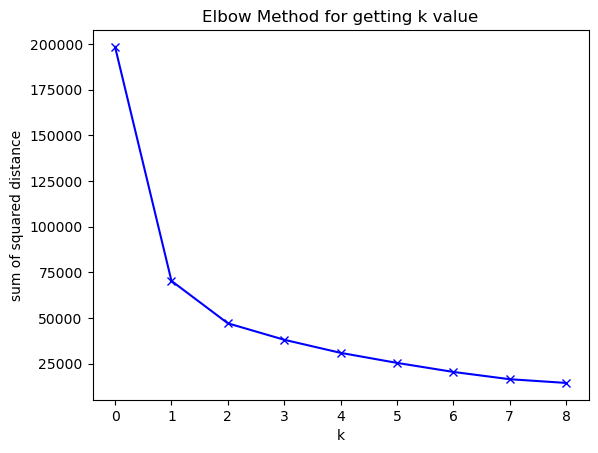

In [67]:
from sklearn.cluster import KMeans              # KMeans 라이브러리를 불러온다.

sum_of_squared_distance = []                    # k의 개수를 구하기 위한 엘보우 메소드의 요소를 넣을 list 변수 생성
K = range(1,10)                                 # 9개만 구해본다.
for k in K:                                     # 1부터 9까지의 for문 반복을 통해 각 Kmeans의 군집을 몇개까지 하면 될지 측정한다.
    km = KMeans(n_clusters = k)                   # KMeans 함수의 설정 - n_clusters = 군집의 개수(정확히는 군집의 centroid 개수이다)
    km = km.fit(df_p)                             # 해당 군집중앙의 개수를 정규화(표준화) 해놓은 df_p data에 적용
    sum_of_squared_distance.append(km.inertia_)   # inertia_함수를 이용해 군집간 거리가 최소가 되는 k를 누적하여 파악한다.




plt.plot(sum_of_squared_distance, '-bx')        # (default = line) plot을 그리고, 컬러를 blue, 포인터를 x로 놓는다. 
plt.xlabel('k')                                 # x축은 k로 지정
plt.ylabel('sum of squared distance')           # y축엔 거리제곱합의 이름
plt.title('Elbow Method for getting k value')   # 제목도 변경한다.
plt.show()    

In [68]:
# from sklearn.cluster import KMeans              # KMeans 라이브러리를 불러온다.

# sum_of_squared_distance = []                    # k의 개수를 구하기 위한 엘보우 메소드의 요소를 넣을 list 변수 생성
# K = range(1,10)                                 # 9개만 구해본다.
# for k in K:                                     # 1부터 9까지의 for문 반복을 통해 각 Kmeans의 군집을 몇개까지 하면 될지 측정한다.
#     km = KMeans(n_clusters = k)                   # KMeans 함수의 설정 - n_clusters = 군집의 개수(정확히는 군집의 centroid 개수이다)
#     km = km.fit(project_df)                             # 해당 군집중앙의 개수를 정규화(표준화) 해놓은 df_p data에 적용
#     sum_of_squared_distance.append(km.inertia_)   # inertia_함수를 이용해 군집간 거리가 최소가 되는 k를 누적하여 파악한다.




# plt.plot(sum_of_squared_distance, '-bx')        # (default = line) plot을 그리고, 컬러를 blue, 포인터를 x로 놓는다. 
# plt.xlabel('k')                                 # x축은 k로 지정
# plt.ylabel('sum of squared distance')           # y축엔 거리제곱합의 이름
# plt.title('Elbow Method for getting k value')   # 제목도 변경한다.
# plt.show()     






In [69]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=100,
                tol=0.001, verbose=0, algorithm='elkan')
kmeans.fit(df_p)
label = kmeans.labels_
label = pd.Series(label)
df_p['label'] = label.values
df_p

,PC1,PC2,label
0,-11.686054,2.898786,2
1,-7.631671,-3.755021,2
2,5.330794,1.601387,1
3,-5.631468,-4.682880,2
4,3.353133,-5.506524,0
...,...,...,...
2211,-2.661090,-0.266252,0
2212,-5.642250,-0.535646,2
2213,9.351561,-5.410724,1
2214,8.335176,-5.459535,1


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

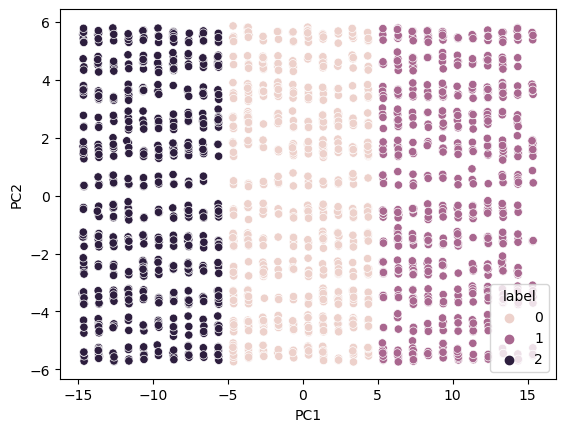

In [70]:
import seaborn as sns
sns.scatterplot(data = df_p, x = 'PC1',y = 'PC2', hue = 'label')

# 다른방법으로 데이터파악하기 
특별한 기준
1. 많이 샀는지 : Mnt_li들
2. 많이 참여했는지 : Accepted_li들

> - (1,2) : (O,O) → best
    - best 분석
> - (1,2) : (O,X) → good
    - good 분석
> - (1,2) : (X,O) → worse
    - worse 분석
> - (1,2) : (X,X) → worst
    - worst 분석

In [32]:
project_df = pd.read_csv('../ml_project1_data.csv')

In [33]:
project_df = project_df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
project_df = project_df[project_df['Income'].notna()].reset_index(drop=True)
project_df['Year_Birth'] = project_df['Year_Birth'].apply(lambda x : np.abs(x-2023+1))

accept_li = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp4']
num_li = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Mnt_li = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

project_df['Accept_all'] = project_df[accept_li].sum(axis=1)

project_df['year'] = project_df['Dt_Customer'].str.split('-').str.get(0).astype(int)
project_df['month'] = project_df['Dt_Customer'].str.split('-').str.get(1).astype(int)
project_df['day'] = project_df['Dt_Customer'].str.split('-').str.get(2).astype(int)

project_df['Mnt_all'] = project_df[Mnt_li].sum(axis=1)
mnt_every_li = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Mnt_all']

project_df['Num_all'] = project_df[num_li].sum(axis=1)
num_every_li = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Num_all'] 


In [34]:
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all
0,5524,65,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,1,0,2012,9,4,1617,32
1,2174,68,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,2014,3,8,27,11
2,4141,57,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,2013,8,21,776,25
3,6182,38,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,2014,2,10,53,14
4,5324,41,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,2014,1,19,422,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,55,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,2013,6,13,1341,23
2212,4001,76,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,0,1,2014,6,10,444,29
2213,7270,41,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,2,2014,1,25,1241,25
2214,8235,66,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,2014,1,24,843,26


## Mnt_all → Mnt_class 만들기

In [35]:
project_df['Mnt_all'].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Mnt_all, dtype: float64

(array([952., 288., 178., 214., 208., 144., 119.,  69.,  32.,  12.]),
 array([   5.,  257.,  509.,  761., 1013., 1265., 1517., 1769., 2021.,
        2273., 2525.]),
 <BarContainer object of 10 artists>)

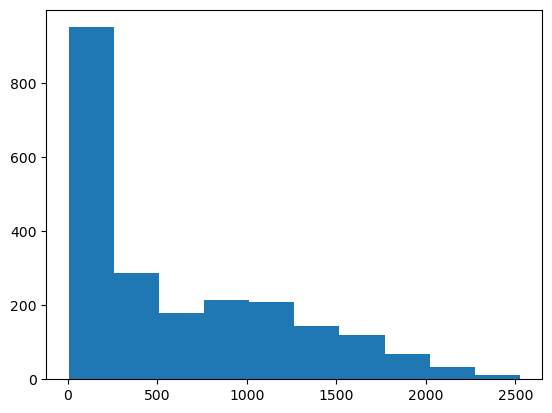

In [36]:
plt.hist(project_df['Mnt_all'])

In [37]:
def make_mnt_class(x:int):
    if x < 500 :
        return 0
    elif x < 1000 :
        return 1
    elif x < 1500 :
        return 2
    elif x < 2000 :
        return 3
    else :
        return 4
    
project_df['Mnt_class'] = project_df['Mnt_all'].map(make_mnt_class)

In [38]:
project_df['Mnt_class'].value_counts()

0    1230
1     388
2     355
3     193
4      50
Name: Mnt_class, dtype: int64

## Accept_all

In [39]:
project_df['Accept_all'].value_counts()

0    1815
1     209
2     132
3      50
4      10
Name: Accept_all, dtype: int64

## 분석
- mnt_class : 0,1,2,3,4
- accept_all : 0,1,2,3,4

> 총경우의 수는 25가지


In [40]:
project_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Accept_all', 'year', 'month',
       'day', 'Mnt_all', 'Num_all', 'Mnt_class'],
      dtype='object')

In [41]:
dic = {}

dic_response = {}
for mnt in set(project_df['Mnt_class']) :
    dic[mnt] = []
    dic_response[mnt] = []
    for accept in set(project_df['Accept_all']) :
        condition_mnt = project_df['Mnt_class'] == mnt
        condition_accept =  project_df['Accept_all'] == accept
        
        condition_response = project_df['Response'] == 1

        how_many = len(project_df[condition_mnt&condition_accept])
        how_response = len(project_df[condition_mnt&condition_accept&condition_response])
        
        dic[mnt].append(how_many)
        dic_response[mnt].append(how_response)

In [42]:
dic

{0: [1112, 84, 30, 4, 0],
 1: [308, 37, 37, 5, 1],
 2: [262, 43, 30, 17, 3],
 3: [114, 36, 24, 13, 6],
 4: [19, 9, 11, 11, 0]}

In [43]:
dic_response

{0: [78, 35, 5, 4, 0],
 1: [17, 13, 7, 3, 1],
 2: [32, 15, 10, 9, 2],
 3: [31, 17, 13, 9, 6],
 4: [8, 5, 5, 8, 0]}

In [44]:
cnt_df = pd.DataFrame(dic)
cnt_df.columns.name = 'Mnt'
cnt_df.index.name = 'Accept_cl'
cnt_df

Mnt,0,1,2,3,4
Accept_cl,,,,,
0,1112,308,262,114,19
1,84,37,43,36,9
2,30,37,30,24,11
3,4,5,17,13,11
4,0,1,3,6,0


In [45]:
len(project_df) - 1112

1104

절반정도 되는 애들이 worst고객!!

이 안에서 각각클래스에 response를 1로 응답한 애들을 찾아보자!!

In [46]:
res_cnt_df = pd.DataFrame(dic_response)
res_cnt_df.columns.name = 'Mnt'
res_cnt_df.index.name = 'Accept_cl'
res_cnt_df

Mnt,0,1,2,3,4
Accept_cl,,,,,
0,78,17,32,31,8
1,35,13,15,17,5
2,5,7,10,13,5
3,4,3,9,9,8
4,0,1,2,6,0


In [47]:
cnt_df / res_cnt_df

Mnt,0,1,2,3,4
Accept_cl,,,,,
0,14.25641,18.117647,8.187500,3.677419,2.375
1,2.40000,2.846154,2.866667,2.117647,1.800
2,6.00000,5.285714,3.000000,1.846154,2.200
3,1.00000,1.666667,1.888889,1.444444,1.375
4,NaN,1.000000,1.500000,1.000000,NaN


In [48]:
prob_class_df = round(res_cnt_df / cnt_df * 100, 2)
# prob_class_df.dropna()
prob_class_df = prob_class_df.fillna(0)
prob_class_df

Mnt,0,1,2,3,4
Accept_cl,,,,,
0,7.01,5.52,12.21,27.19,42.11
1,41.67,35.14,34.88,47.22,55.56
2,16.67,18.92,33.33,54.17,45.45
3,100.00,60.00,52.94,69.23,72.73
4,0.00,100.00,66.67,100.00,0.00


수량을 많이사고, 캠페인에 많이 참여하는 사람일수록, 다음캠페인에 참여할 확률이 높다

In [49]:
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,Mnt_class
0,5524,65,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,1,0,2012,9,4,1617,32,3
1,2174,68,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,2014,3,8,27,11,0
2,4141,57,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,2013,8,21,776,25,1
3,6182,38,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,2014,2,10,53,14,0
4,5324,41,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,2014,1,19,422,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,55,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,2013,6,13,1341,23,2
2212,4001,76,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,2014,6,10,444,29,0
2213,7270,41,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,2,2014,1,25,1241,25,2
2214,8235,66,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,2014,1,24,843,26,1


# 우리 과제 해보기 

## 'Income'에 대해서 세금기준으로 비교
https://smartasset.com/taxes/current-federal-income-tax-brackets

In [50]:
tax_li = []
for ii in range(len(project_df)):
    marital = project_df.iloc[ii]['Marital_Status']
    income = project_df.iloc[ii]['Income']
    if marital in ['Single', 'Alone', 'YOLO', 'Absurd']:
        if income <= 10275:
            tax = 10
        elif income <= 41775:
            tax = 12
        elif income <= 89075 :
            tax = 22
        elif income <= 170050 :
            tax = 24
        else :
            tax = 37
    else:
        if income <= 20550:
            tax = 10
        elif income <= 83550:
            tax = 12
        elif income <= 178150 :
            tax = 22
        elif income <= 340100 :
            tax = 24
        else :
            tax = 37
    tax_li.append(tax)

        

In [51]:
project_df['tax'] = tax_li

In [52]:
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,Mnt_class,tax
0,5524,65,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,1,0,2012,9,4,1617,32,3,22
1,2174,68,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,2014,3,8,27,11,0,22
2,4141,57,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,2013,8,21,776,25,1,12
3,6182,38,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,2014,2,10,53,14,0,12
4,5324,41,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,2014,1,19,422,24,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,55,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,2013,6,13,1341,23,2,12
2212,4001,76,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,1,2014,6,10,444,29,0,12
2213,7270,41,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,2,2014,1,25,1241,25,2,12
2214,8235,66,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,2014,1,24,843,26,1,12


##  'MntWines'분류 : 좋은것 같진 않음

<AxesSubplot:ylabel='Frequency'>

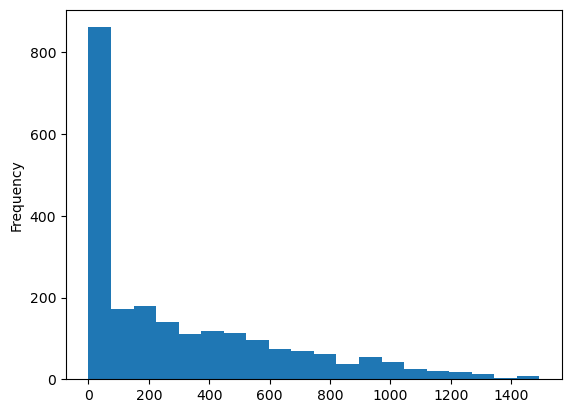

In [53]:
project_df['MntWines'].plot(kind='hist', bins=20)

In [55]:
def make_winechange(x:int):
    if x <= 100 :
        return 100
    else :
        return int(str(x)[0])*100
project_df['MntWines'] = project_df['MntWines'].map(make_winechange)

<AxesSubplot:ylabel='Frequency'>

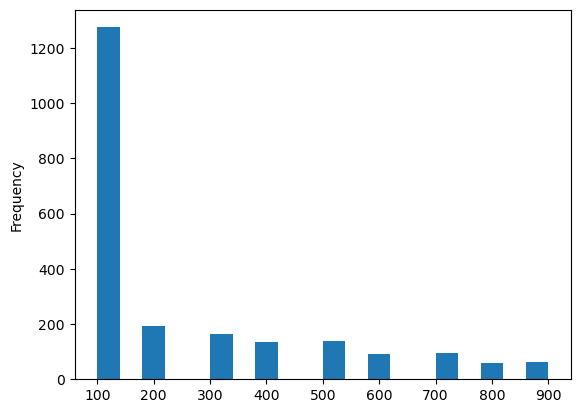

In [56]:
project_df['MntWines'].plot(kind='hist', bins=20)

In [71]:
ifood_df = pd.read_csv('../ifood_df.csv')
project_df = pd.read_csv('../ml_project1_data.csv')

In [73]:
project_df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [74]:
project_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')